# Введение в аналитику данных: домашнее задание 2

В этом домашнем задании мы будем проверять гипотезы. Во всех задачах подробно обосновывайте выбор критерия для проверки гипотезы и делайте выводы (можно пользоваться учебниками и генеративными моделями - но пропускайте подсказки ассистентов через голову).

У вас будет 4 задания - каждое весит 2.5 балла из 10, суммарно за домашнее задание можно набрать 10 баллов.

Оцениваются:

* корректность полученных результатов
* подробность обоснования выбора статистических тестов и выводы

Ответы записывайте внутри вашего рабочего google colab, а также (подробно текстом) дублируйте [в форму](https://docs.google.com/forms/d/e/1FAIpQLSfddNy4g88YHPA4fux1TLYaweFf4SWPiU0loeuwCYID7eiW4w/viewform?usp=sf_link).

In [ ]:
import numpy as np
import pandas as pd

from scipy import stats as sts

import seaborn as sns
import matplotlib.pyplot as plt

## Задание 1 (рейтинги президентов)

В таблице `presidents.csv` представлены рейтинги различных президентов США (интересно, почему не российских). Социальные опросы проводились раз в квартал. Опрашивалась случайная выборка граждан. У каждого спрашивалось одобряет ли он деятельность президента.

Ричард Никсон был президентом США с 20 января 1969 года по 9 августа 1974 года. 17 июня 1972 года произошёл Уотергейтский скандал. Давайте проанализируем, что при этом произошло с его рейтингом.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/all_datasets/main/presidents.csv')
df.head()

,year,Qtr1,Qtr2,Qtr3,Qtr4
0,1945,NaN,87,82.0,75.0
1,1946,63.0,50,43.0,32.0
2,1947,35.0,60,54.0,55.0
3,1948,36.0,39,NaN,NaN
4,1949,69.0,57,57.0,51.0


Чтобы привести таблицу к удобному виду используйте функцию `pd.melt`. Вытащите из таблички рейтинг Никсона с 1 квартала 1969 года по 2 квартал 1972 года (включая его). Запишите эти данные в переменную `x`. Рейтинг с 3 квартала 1972 года по 2 квартал 1974 года поместите в переменную `y`. Пропуски в данных удалите из выборки.

In [ ]:
x = df[(1969 <= df['year']) & (df['year'] <= 1972)]
x = pd.melt(x, id_vars=['year'], var_name='Quarter', value_name='Rating').dropna()
print(x)

y = df[(1973 <= df['year'])]
y = pd.melt(y, id_vars='year').dropna()
y = y[~((y['year'] == 1974) & (y['variable'].isin(['Qtr3','Qtr4'])))]
print(y)

    year Quarter  Rating
0   1969    Qtr1    59.0
1   1970    Qtr1    66.0
2   1971    Qtr1    51.0
3   1972    Qtr1    49.0
4   1969    Qtr2    65.0
5   1970    Qtr2    53.0
6   1971    Qtr2    48.0
7   1972    Qtr2    61.0
8   1969    Qtr3    65.0
9   1970    Qtr3    61.0
10  1971    Qtr3    54.0
12  1969    Qtr4    56.0
13  1970    Qtr4    52.0
14  1971    Qtr4    49.0
   year variable  value
0  1973     Qtr1   68.0
1  1974     Qtr1   28.0
2  1973     Qtr2   44.0
3  1974     Qtr2   25.0
4  1973     Qtr3   40.0
6  1973     Qtr4   27.0


Правда ли, что после скандала средний рейтинг Никсона рухнул? Предполагайте, что рейтинг распределён нормально, а также, что дисперсия рейтинга не изменилась из-за скандала. Наблюдаемое значение статистики запишите в переменную `obs`, в переменную `pval` запишите $p$-значение.

h0: mu_x = mu_y

h1: mu_x > mu_y

In [ ]:
from scipy.stats import ttest_ind
obs, pval = sts.ttest_ind(x['Rating'], y['value'], alternative='greater',equal_var=True)
print(obs, pval)
if pval < 0.05:
    print('Отвергаем нулевую гипотезу на уровне значимости 95%')
else:
    print('Не отвергаем нулевую гипотезу на уровне значимости 95%')

3.5640741313229793 0.0011087344846424454
Отвергаем нулевую гипотезу на уровне значимости 95%


In [ ]:
# небольшая самопроверка
assert np.abs(obs - 3.5640741313229793) < 1e-5

**Почему вы выбрали именно этот критерий для проверки гипотезы? Какие выводы вы сделали?**

**Ответ (продублируйте в гугл-форму):**

Я использовала T-test, так как данные распределены нормально и дисперсия не изменилась. Мы отвергли нулевую гипотезу, значит средний рейтинг Никсона рухнул после скандала

Снова президентом Никсон станет в $3000$ году.

![](https://vignette.wikia.nocookie.net/futurama/images/2/2f/Richard_M._Nixon%27s_head.jpg/revision/latest/scale-to-width-down/250?cb=20131123190522&path-prefix=ru)

## Задание 2 (доктор сон)

Проводится эксперимент о пользе нового снотворного. Для его проведения используется группа из $10$ студентов. В первый день каждый из них ложится спать. На утро измеряется, сколько он проспал. Из результата вычитают $8$ (нормальное число часов сна). На второй день каждому дают таблетку. Утром снова измеряют, сколько человек проспал, и вычитают $8$. Результаты эксперимента записаны в табличку `sleep.csv`.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/all_datasets/main/sleep.csv')
df.head()

,extra,group,ID
0,0.7,1,1
1,-1.6,1,2
2,-0.2,1,3
3,-1.2,1,4
4,-0.1,1,5


Правда ли, что сон студентов до приёма снотворного не отличается от нормы (отклонение от 8 часов равно нулю). Проверьте эту гипотезу на $5\%$ уровне значимости, в переменную `pval1` запишите p-значение.

h0: сон до приема снотворного не отличается от нормы

h1: сон до приема снотворного отличается от нормы

In [ ]:
from scipy.stats import ttest_1samp
x1 = df[df['group'] == 1].drop(columns=['group', 'ID'])
y1 = df[df['group'] == 2].drop(columns=['group', 'ID'])

tobs1, pval1 = ttest_1samp(x1['extra'], 0, alternative='two-sided')
print(tobs1, pval1)
if pval1 < 0.05:
    print('Отвергаем нулевую гипотезу на уровне значимости 5%')
else:
    print('Не отвергаем нулевую гипотезу на уровне значимости 5%')

1.3257101407138212 0.2175977800684489
Не отвергаем нулевую гипотезу на уровне значимости 5%


Правда ли, что благодаря таблеткам студенты стали спать больше (односторонняя альтернатива)? Запишите в переменную `pval2` соотвествующее p-значение.

h0: mx = my

h1: mx > my

In [ ]:
from scipy.stats import ttest_rel
tobs2, pval2 = ttest_rel(y1['extra'], x1['extra'], alternative='greater')
print(tobs2, pval2)
if pval2 < 0.05:
    print('Отвергаем нулевую гипотезу на уровне значимости 5%')
else:
    print('Не отвергаем нулевую гипотезу на уровне значимости 5%')

4.062127683382037 0.001416445098692135
Отвергаем нулевую гипотезу на уровне значимости 5%


In [ ]:
# самопроверка
assert np.abs(tobs1 - 1.325710) < 1e-5
assert np.abs(tobs2 - 4.062127) < 1e-5

**Почему вы выбрали именно этот критерий для проверки гипотезы? Какие выводы вы сделали?**

**Ответ (продублируйте в гугл-форму):**

Я использовала T-test, так как данные распределены нормально. В первом задании я использовала t-критерий для one sample выборки. Тест показал, что сон студентов до приема нового снотворного не отличается от нормы. Во втором задании у нас парный семпл, так как исследования проводятся на одинаковых обьектах, но при разных условиях. По результатам теста видно, что благодаря таблеткам студенты стали спать больше.

## Задание 3 (мыши и зеркало)

$16$ лабораторных мышей были помещены в двухкомнатные клетки, в одной из комнат висело зеркало. С целью установить, есть ли у мышей какие-то предпочтения насчет зеркал, измерялась доля времени, которое каждая мышь проводила в каждой из своих двух клеток.

![](https://ars.els-cdn.com/content/image/1-s2.0-S0168159104000061-gr1.gif)

В файле `mouses_mirror.txt` лежит информация о том, какую долю времени мышка проводила в клетке с зеркалом.

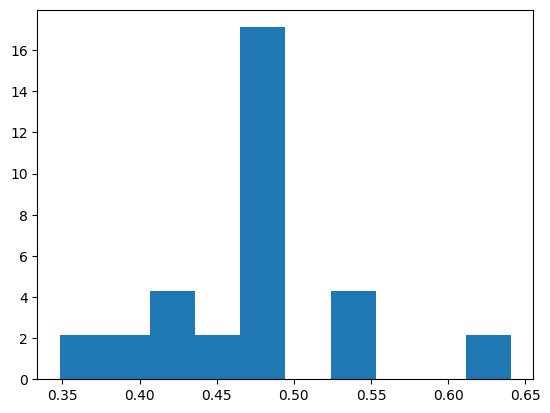

In [ ]:
x = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/all_datasets/main/mouses_mirror.txt', header = None)[0].values
plt.hist(x, density=True);

Проверьте гипотезу о том, что мышкам безразлично в какой комнате проводить время с помощью критерия знаков. Сформулируйте нулевую гипотезу, перечислите основные особенности этого критерия. Запишите в переменную `pvalue_1` получившееся в результате этого $p$-значение.

h0: p = 0.5

h1: p != 0.5

In [ ]:
from scipy.stats import binomtest
ans = sts.binomtest(sum(x > 0.5), len(x), p=0.5, alternative='two-sided')
pvalue_1 = ans.pvalue
if pvalue_1 < 0.05:
    print('Отвергаем нулевую гипотезу на уровне значимости 5%')
else:
    print('Не отвергаем нулевую гипотезу на уровне значимости 5%')

Отвергаем нулевую гипотезу на уровне значимости 5%


Проверьте гипотезу о том, что мышкам безразлично в какой комнате проводить время с помощью теста Вилкоксона. Сформулируйте нулевую гипотезу, перечислите основные особенности этого критерия.  Запишите в переменную `pvalue_2` получившееся в результате этого $p$-значение.

h0: распределение одинаково

h1: распределение разное

In [ ]:
from scipy.stats import wilcoxon
stat, pvalue_2 = sts.wilcoxon(x - 0.5)
if pvalue_2 < 0.05:
    print('Отвергаем нулевую гипотезу на уровне значимости 5%')
else:
    print('Не отвергаем нулевую гипотезу на уровне значимости 5%')

Не отвергаем нулевую гипотезу на уровне значимости 5%


Проверьте гипотезу о том, что мышкам безразлично в какой комнате проводить время с помощью асимптотического $z$-теста. Сформулируйте нулевую гипотезу, перечислите основные особенности этого критерия.  Запишите в переменную `pvalue_3` получившееся в результате этого $p$-значение.

h0: p = 0.5

h1: p != 0.5

In [ ]:
from statsmodels.stats.weightstats import ztest, zconfint
z_stat, pvalue_3 = ztest(x1, value=0.5)
if pvalue_3 < 0.05:
    print('Отвергаем нулевую гипотезу на уровне значимости 5%')
else:
    print('Не отвергаем нулевую гипотезу на уровне значимости 5%')

Не отвергаем нулевую гипотезу на уровне значимости 5%


In [ ]:
# проверка того, что задание решено верно
assert pvalue_1 < 0.05
assert pvalue_2 > 0.05
assert pvalue_3 > 0.05

Объясните, почему `pvalue` от теста к тесту ведёт себя именно так. Подробнее про опыт с мышками читайте [в оригинальном исследовании.](https://www.sciencedirect.com/science/article/abs/pii/S0168159104000061)

__Ответ (продублируйте в гугл-форму):__

P-value отличается в зависимости от особенности теста

В первом задании мы использовали биномиальный тест посколько с помощью него возможно проверить пропорцию времени, которую мыши проводили в комнате. Пропорция будет равна 0,5, если мышам нет разницы в какой комнате находиться

Во втором задании мы использовали тест Вилкоксона, который проверяет гипотезу о том, что распределение времени, проведенного мышками в клетке с зеркалом, одинаково. В ланном кейсе мы сравниваем медиану разностей, если по результатам теста  медиана равна 0, то мышам безразлично, в какой комнате находиться

В третьем задании мы использовали z-тест, который проверяет гипотезу о том, что среднее время, проведенное мышами в клетке с зеркалом, равно 0.5.  Если среднее время равно 0.5, то мышам безразлично в какой комнате находиться

## Задание 4 (транзакции клиентов)

Для увеличения конверсии мы хотим переименовать кнопку "Subscribe now!" на сайте в "Keep me updated".

Данные о результатах A/B-теста находятся в таблице `a_b_test`. В колонке `transaction` для каждого клиента указано, кликнул он по кнопке или нет.

Оцените эффект от изменения названия кнопки.



In [ ]:
a_b_test = pd.read_csv("https://raw.githubusercontent.com/aiedu-courses/all_datasets/main/ClientsTransactions.csv")

a_b_test.head()

,group,transaction
0,B,0
1,B,0
2,A,0
3,B,0
4,A,0


Создайте summary_table. Код должен иметь структуру (названия колонок, строк и их количество) как на таблице со скриншота.

In [ ]:
summary_table = a_b_test.groupby('group')['transaction'].agg(['count', 'sum'])
summary_table.columns = ['Number of Clients', 'Number of Transactions']
summary_table['Conversion Rate'] = summary_table['Number of Transactions'] / summary_table['Number of Clients']
summary_table.reset_index()

,group,Number of Clients,Number of Transactions,Conversion Rate
0,A,2060,56,0.027184
1,B,2338,74,0.031651


Отфильтруйте исходную таблицу, оставив в ней только клиентов группы А - результат назовите A_group. Создайте аналогичный объект B_group по группе B.

Нарисуйте гистограмму, отображающую на одном рисунке количество успешных транзакций (кликов по кнопке) для каждой группы.

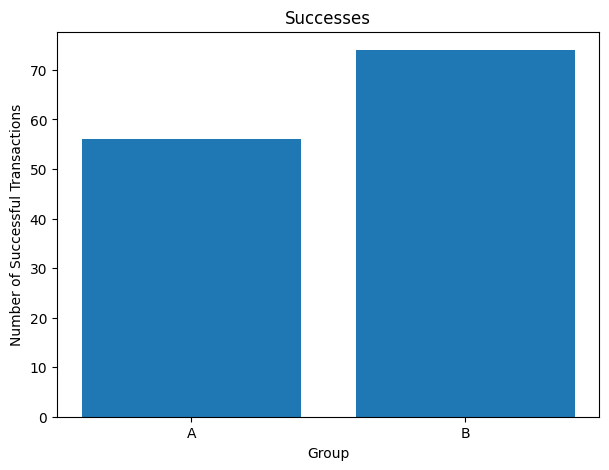

In [ ]:
A_group = a_b_test[a_b_test['group'] == 'A']
B_group = a_b_test[a_b_test['group'] == 'B']
A_success = A_group['transaction'].sum()
B_success = B_group['transaction'].sum()
group = ['A', 'B']
successes = [A_success, B_success]
plt.figure(figsize=(7, 5))
plt.bar(group, successes)
plt.xlabel('Group')
plt.ylabel('Number of Successful Transactions')
plt.title('Successes')
plt.show()

Проведите статистический тест для сравнения эффекта от изменения названия кнопки. Сначала сформулируйте гипотезу, затем выберите тест и фиксируйте уровень значимости 0.05. Выберите подходящий тест и объясните его выбор. Проверьте гипотезу и сделайте выводы.

__Выводы (продублируйте в гугл-форму):__


h0: Изменение названия кнопки не влияет на конверсию

h1: Изменение названия кнопки влияет на конверсию

In [ ]:
from statsmodels.stats.proportion import proportions_ztest
stat, pval = proportions_ztest([B_success, A_success], [B_group.shape[0], A_group.shape[0]])
if pval < 0.05:
    print('Отвергаем нулевую гипотезу на уровне значимости 5%')
else:
    print('Не отвергаем нулевую гипотезу на уровне значимости 5%')

Не отвергаем нулевую гипотезу на уровне значимости 5%


Так как у нас есть две независимые выборки (группы A и B), я использовала  z-тест для двух пропорций. Этот тест позволяет сравнить пропорции двух групп и определить, есть ли статистически значимая разница между ними. По его результату можно сделать вывод, что конверсия не отличается